In [127]:
%load_ext autoreload
%autoreload 2
% pylab inline

pylab.rcParams['figure.figsize'] = (15, 6)

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import seaborn as sns

sns.set_style("darkgrid")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


 /Users/tmpethick/anaconda3/envs/eth/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning:pylab import has clobbered these variables: ['plot']
`%matplotlib` prevents importing * from pylab and numpy


Optimization terminated successfully.
         Current function value: 145.658771
         Iterations: 121
         Function evaluations: 264


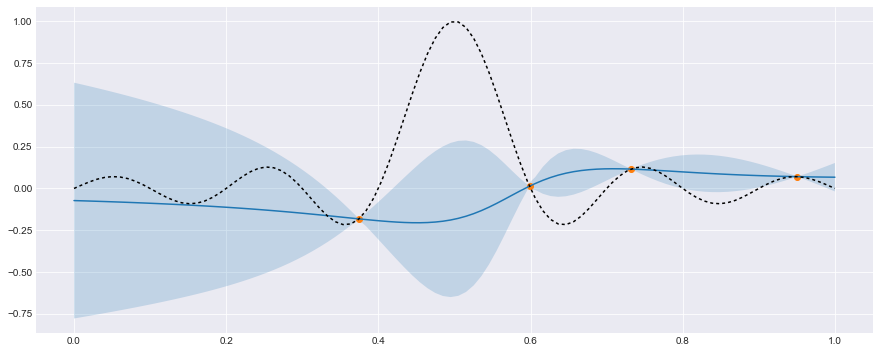

In [128]:
from src.bo import *
from src.dngo import *
from src.acquisition_functions import EI, UCB

def f(x):
    return np.sinc(x * 10 - 5).sum(axis=1)[:, None]

rng = np.random.RandomState(42)
x_train = rng.uniform(0, 1, 4)[:, None]
y_train = f(x_train)

################

nn = TFModel(input_dim=1, dim_basis=50, epochs=1000, batch_size=10)
reg = BayesianLinearRegression(num_mcmc=0, burn_in=1000, mcmc_steps=1000)
model = BOModel(nn, regressor=reg)
model.init(x_train, y_train)

x = (np.linspace(0, 1, 100))[:,None]
y = f(x)
model.plot_prediction(x,y)

Optimization terminated successfully.
         Current function value: 134.002920
         Iterations: 78
         Function evaluations: 175


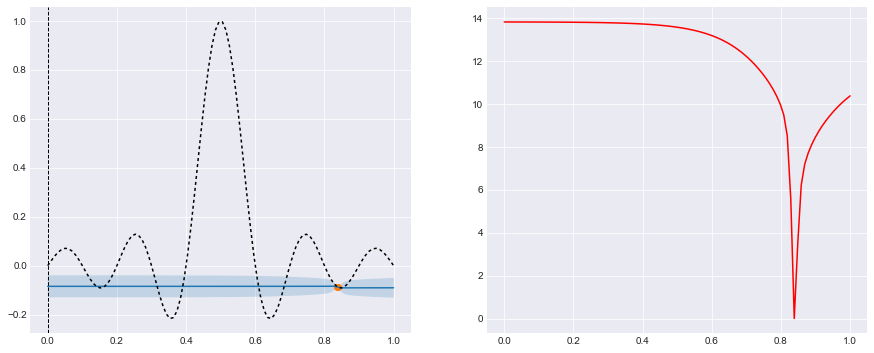

Optimization terminated successfully.
         Current function value: 141.905499
         Iterations: 67
         Function evaluations: 142


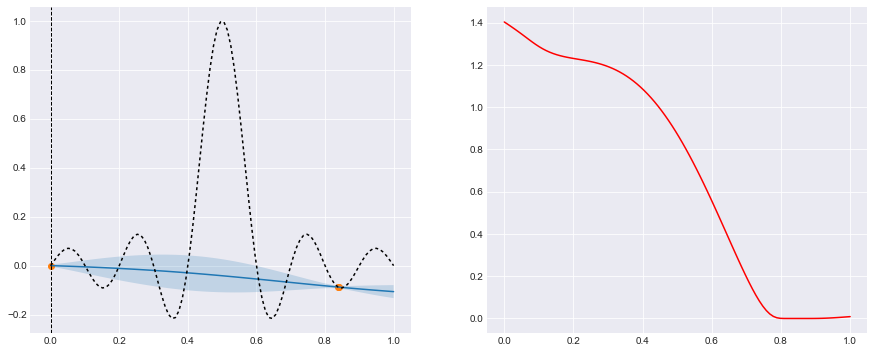

Optimization terminated successfully.
         Current function value: 141.075454
         Iterations: 103
         Function evaluations: 219


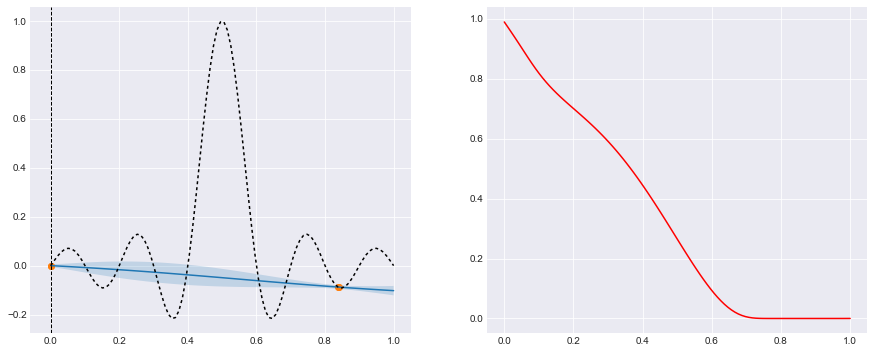

Optimization terminated successfully.
         Current function value: 139.911518
         Iterations: 81
         Function evaluations: 177


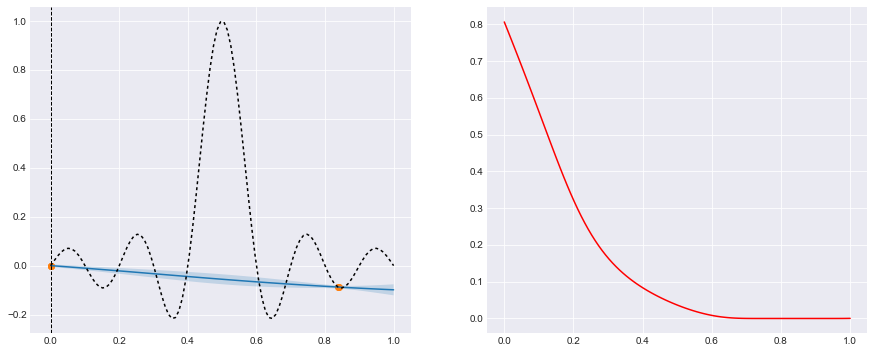

Optimization terminated successfully.
         Current function value: 138.312984
         Iterations: 107
         Function evaluations: 220


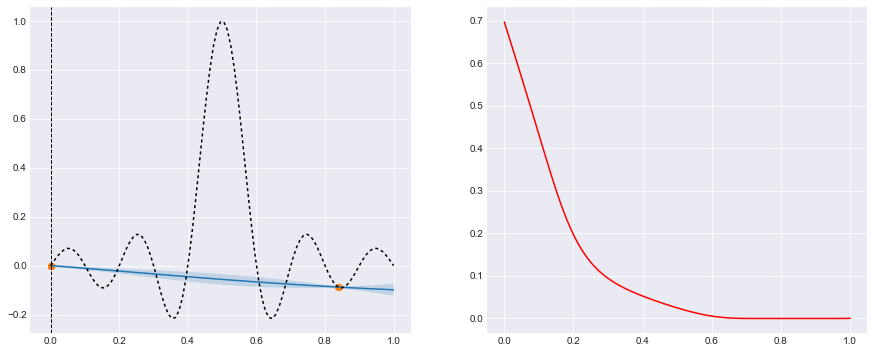

Optimization terminated successfully.
         Current function value: 137.541974
         Iterations: 131
         Function evaluations: 283


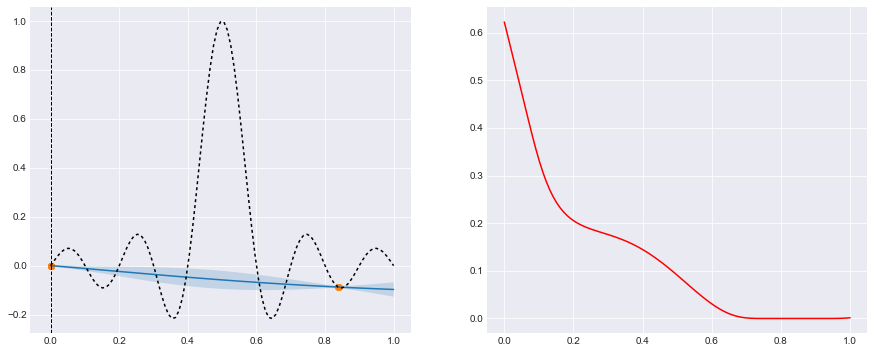

Optimization terminated successfully.
         Current function value: 136.090784
         Iterations: 138
         Function evaluations: 286


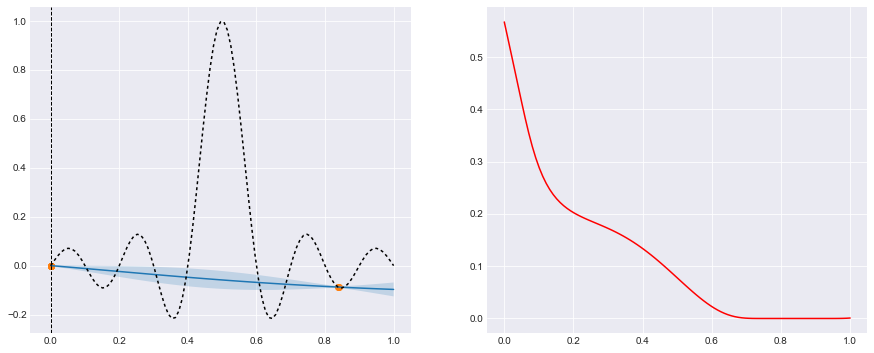

Optimization terminated successfully.
         Current function value: 135.311227
         Iterations: 97
         Function evaluations: 213


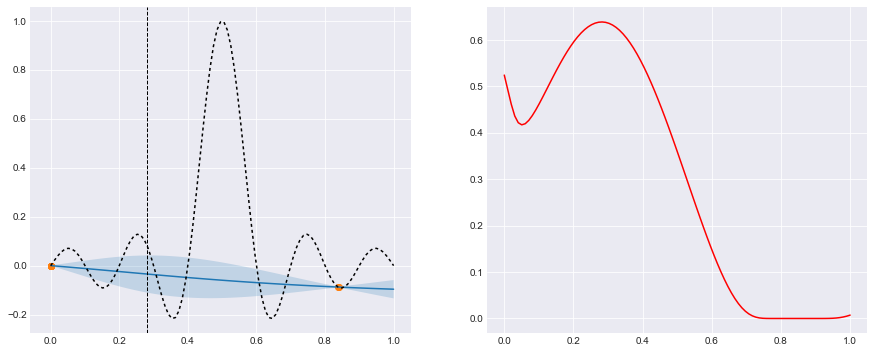

 /Users/tmpethick/GoogleDrive/dtu/8-5-ETH-summer/eth-project/src/priors.py:24: RuntimeWarning:divide by zero encountered in log
 /Users/tmpethick/anaconda3/envs/eth/lib/python3.6/site-packages/scipy/optimize/optimize.py:563: RuntimeWarning:invalid value encountered in subtract


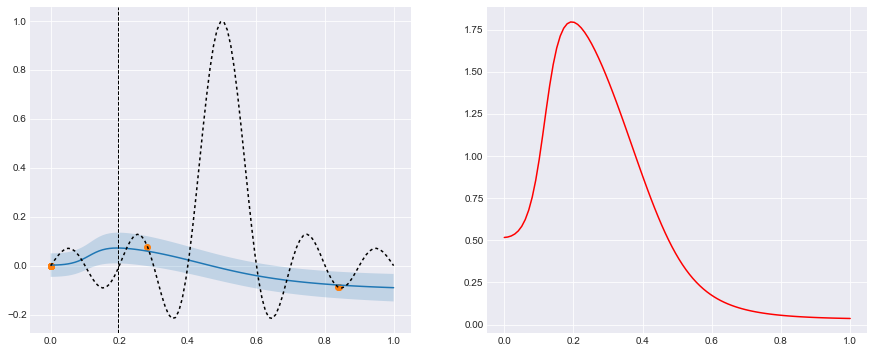

Optimization terminated successfully.
         Current function value: 149.962550
         Iterations: 64
         Function evaluations: 142


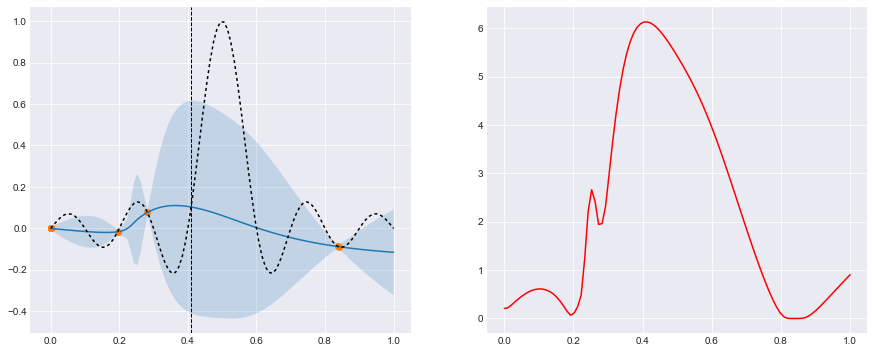

Optimization terminated successfully.
         Current function value: 148.658373
         Iterations: 64
         Function evaluations: 140


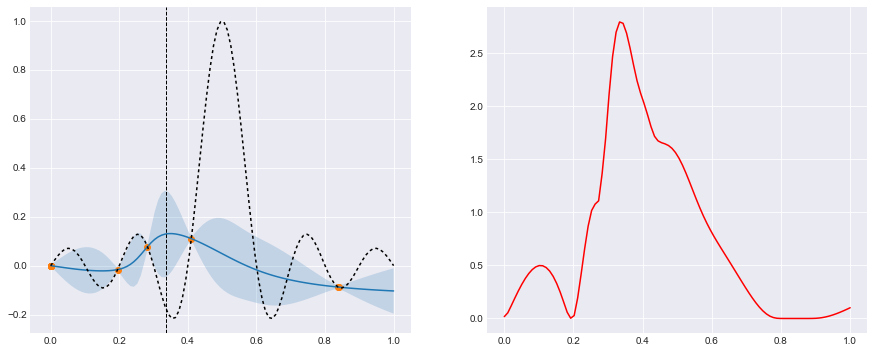

Optimization terminated successfully.
         Current function value: 151.997583
         Iterations: 60
         Function evaluations: 141


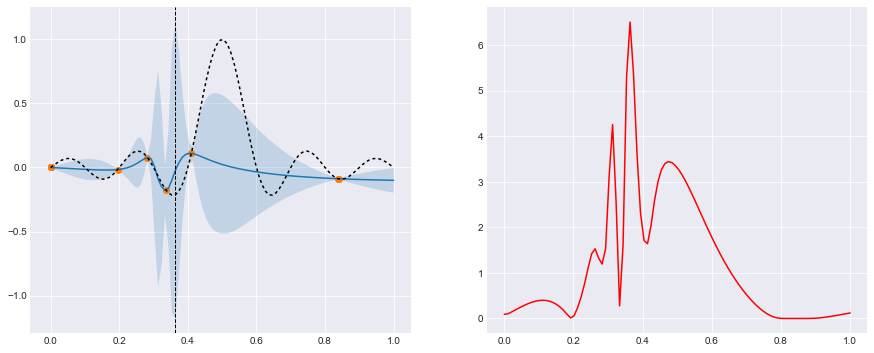

Optimization terminated successfully.
         Current function value: 181.219403
         Iterations: 67
         Function evaluations: 166


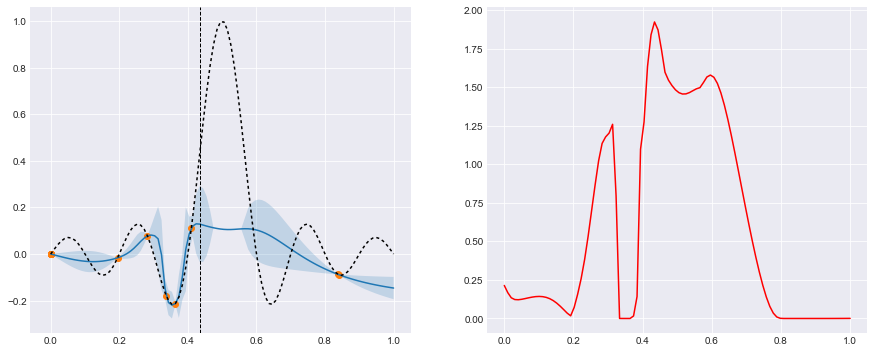

Optimization terminated successfully.
         Current function value: 146.387291
         Iterations: 60
         Function evaluations: 146


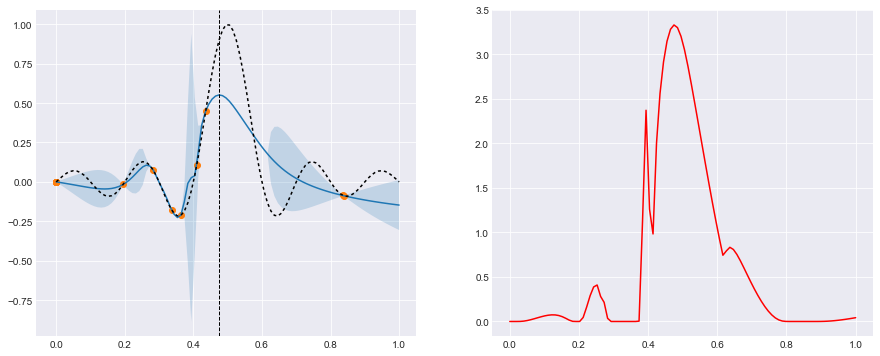

Optimization terminated successfully.
         Current function value: 162.391339
         Iterations: 70
         Function evaluations: 156


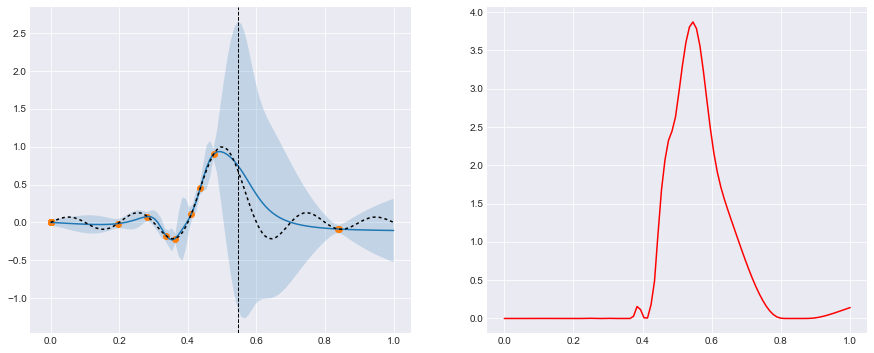

Optimization terminated successfully.
         Current function value: 149.496699
         Iterations: 102
         Function evaluations: 233


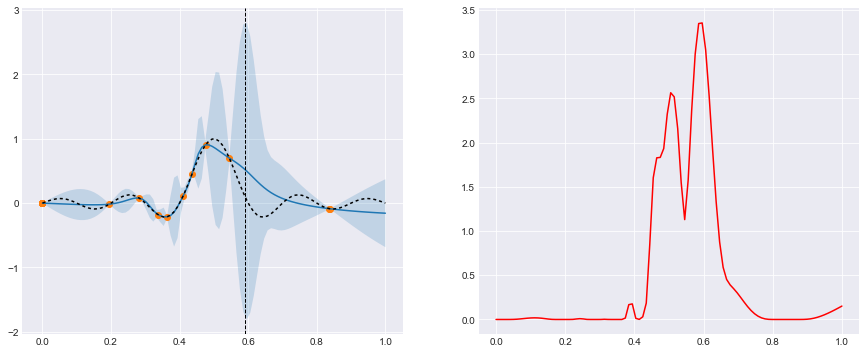

Optimization terminated successfully.
         Current function value: 160.730599
         Iterations: 67
         Function evaluations: 153


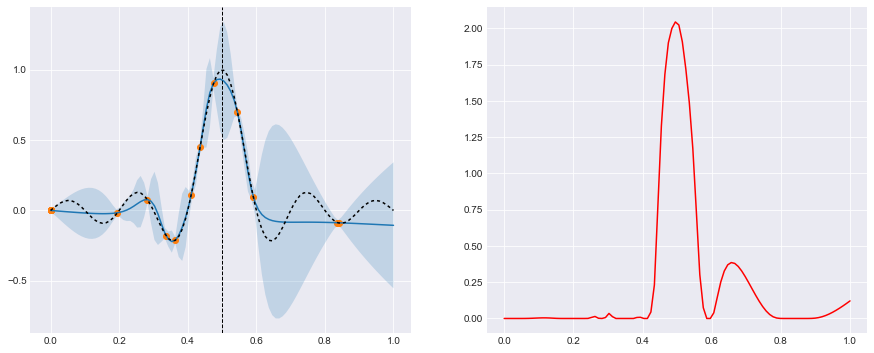

Optimization terminated successfully.
         Current function value: 153.015430
         Iterations: 59
         Function evaluations: 155


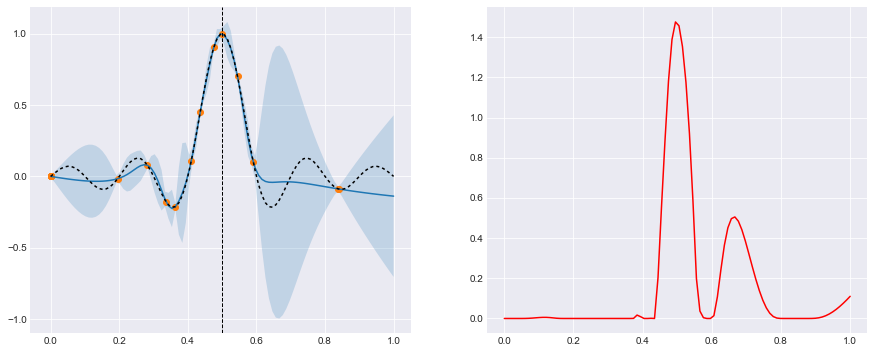

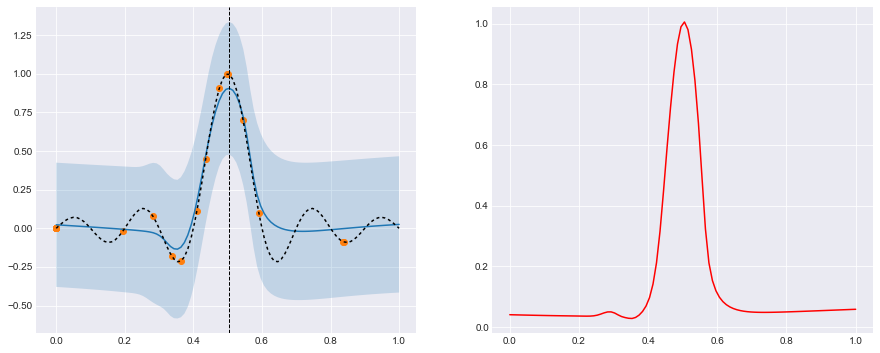

Optimization terminated successfully.
         Current function value: 154.251199
         Iterations: 61
         Function evaluations: 145


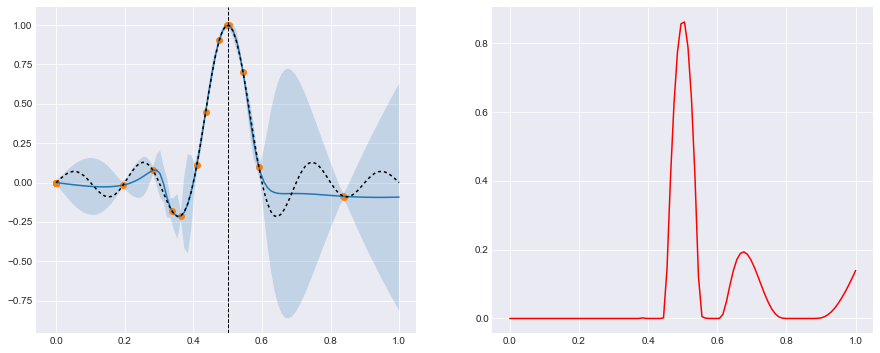

Optimization terminated successfully.
         Current function value: 166.010377
         Iterations: 61
         Function evaluations: 138


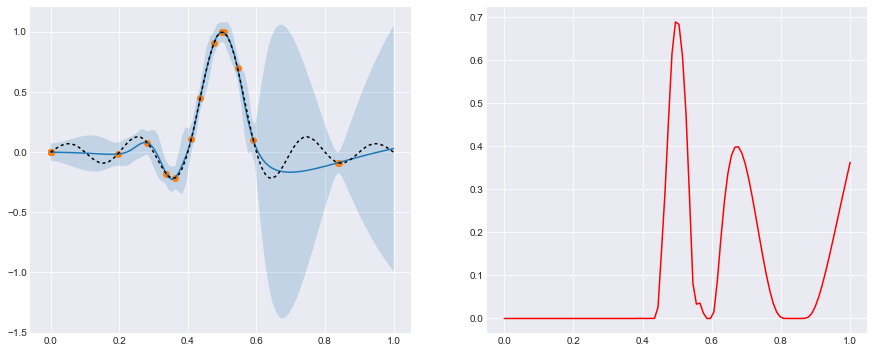

In [6]:
acq = EI(model, par=0.01)
# acq = UCB(model)
bo = BO(f, model, acquisition_function=acq, n_iter=20, bounds=np.array([[0,1]]))
bo.run()

In [129]:
from hpolib.benchmarks.synthetic_functions import Branin

from src.bo import random_hypercube_samples, vectorize

f = Branin()
info = f.get_meta_information()
bounds = np.array(info['bounds'])
f = vectorize(f)

In [130]:
# Random sample
samples = random_hypercube_samples(100, bounds)
values = f(samples)
values[np.argmax(values)]

array([ 203.74415864])

Optimization terminated successfully.
         Current function value: 134.884061
         Iterations: 110
         Function evaluations: 244


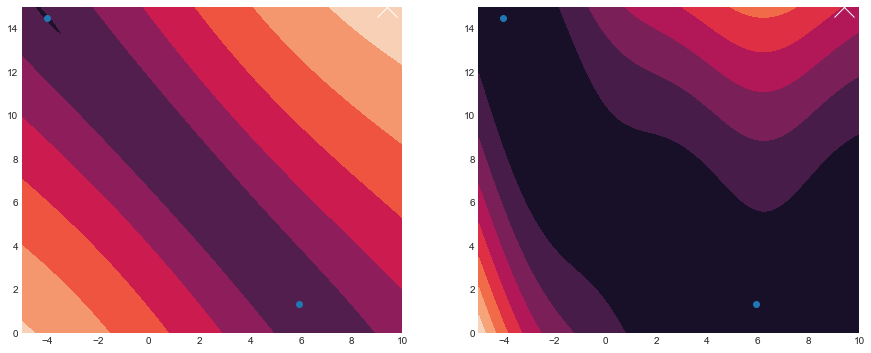

Optimization terminated successfully.
         Current function value: 144.995126
         Iterations: 94
         Function evaluations: 206


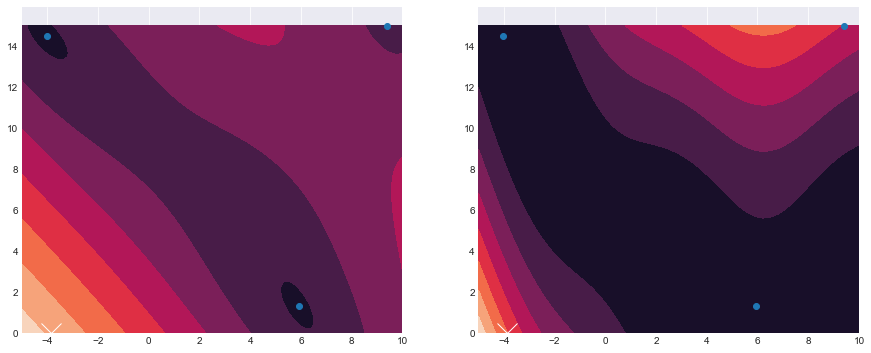

Optimization terminated successfully.
         Current function value: 148.524877
         Iterations: 86
         Function evaluations: 214


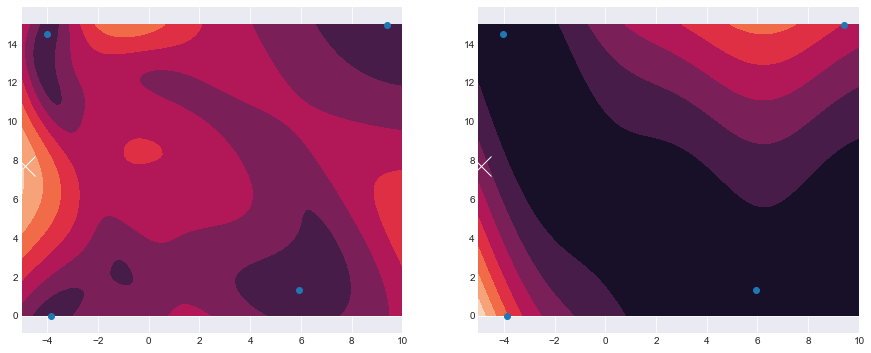

 /Users/tmpethick/GoogleDrive/dtu/8-5-ETH-summer/eth-project/src/priors.py:24: RuntimeWarning:divide by zero encountered in log
 /Users/tmpethick/anaconda3/envs/eth/lib/python3.6/site-packages/scipy/optimize/optimize.py:563: RuntimeWarning:invalid value encountered in subtract


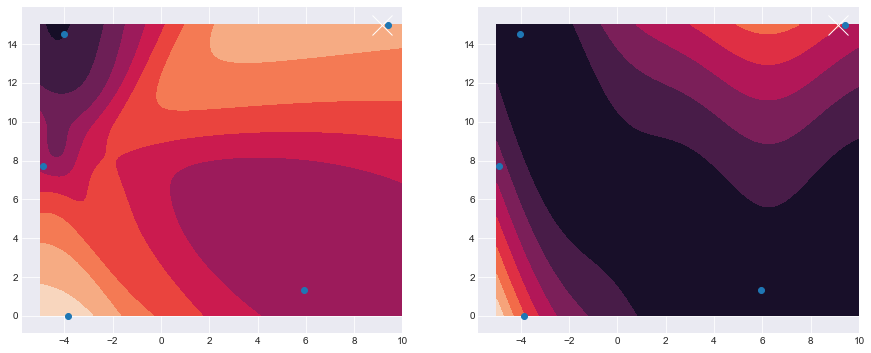

Optimization terminated successfully.
         Current function value: 156.910380
         Iterations: 64
         Function evaluations: 153


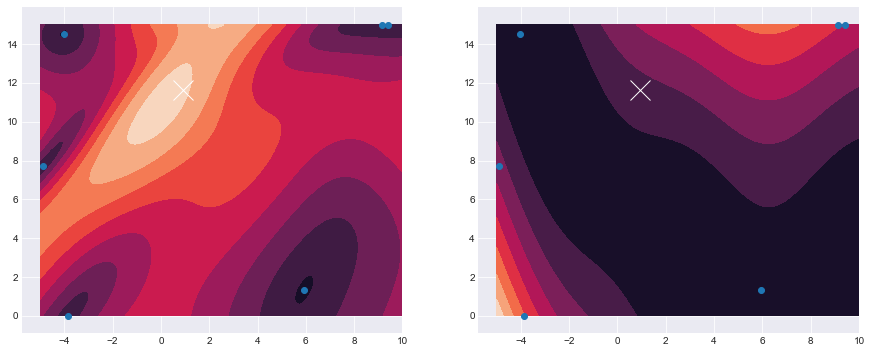

Optimization terminated successfully.
         Current function value: 160.370628
         Iterations: 72
         Function evaluations: 156


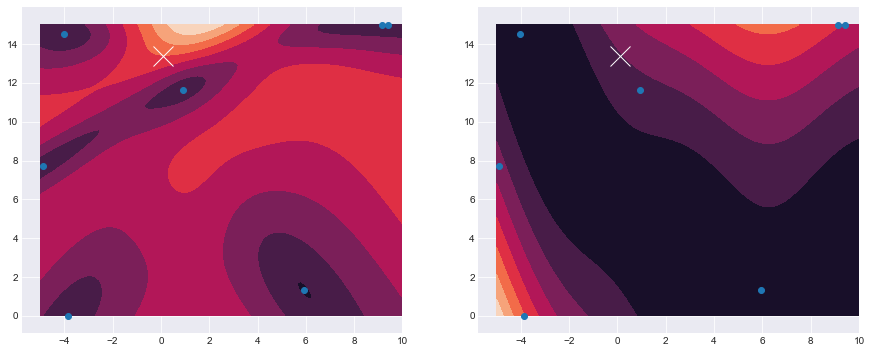

Optimization terminated successfully.
         Current function value: 160.242552
         Iterations: 60
         Function evaluations: 145


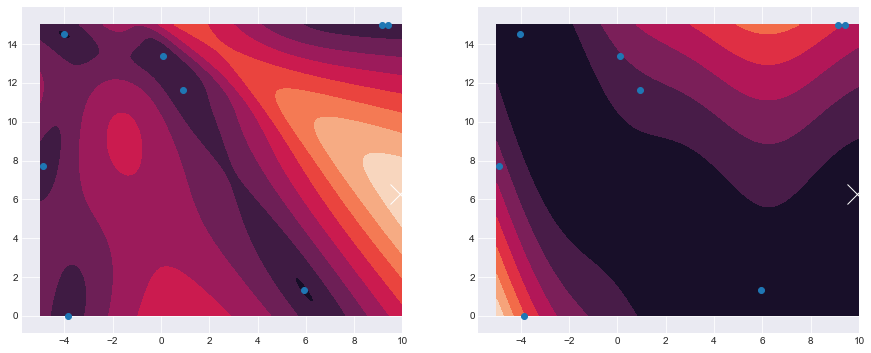

Optimization terminated successfully.
         Current function value: 166.736779
         Iterations: 69
         Function evaluations: 155


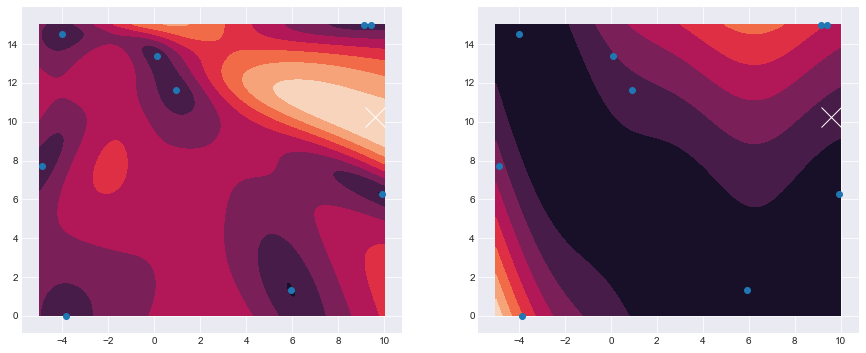

Optimization terminated successfully.
         Current function value: 163.110396
         Iterations: 58
         Function evaluations: 140


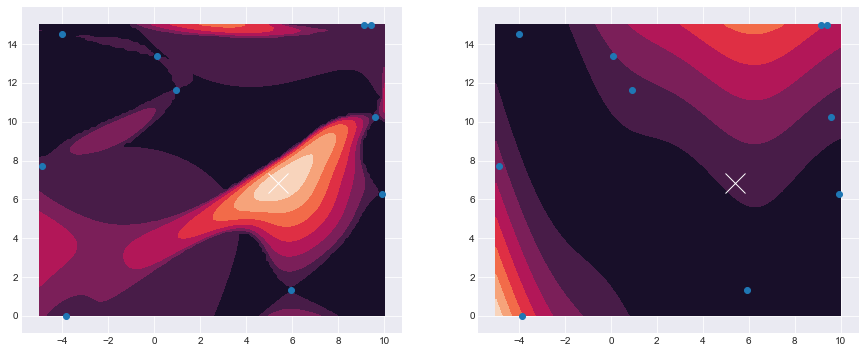

Optimization terminated successfully.
         Current function value: 199.549066
         Iterations: 55
         Function evaluations: 147


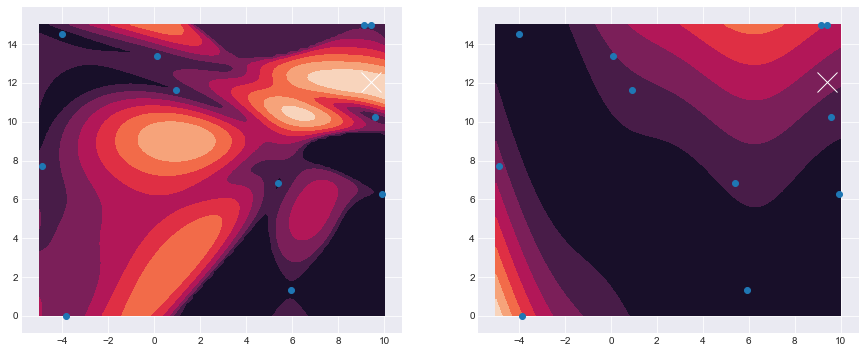

Optimization terminated successfully.
         Current function value: 174.302654
         Iterations: 79
         Function evaluations: 175


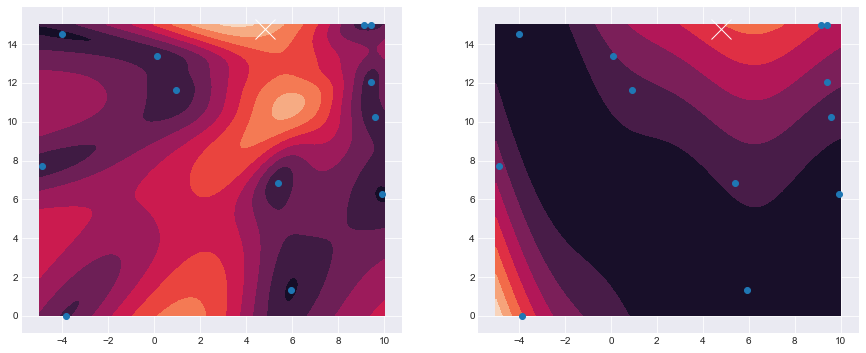

Optimization terminated successfully.
         Current function value: 175.403843
         Iterations: 59
         Function evaluations: 137


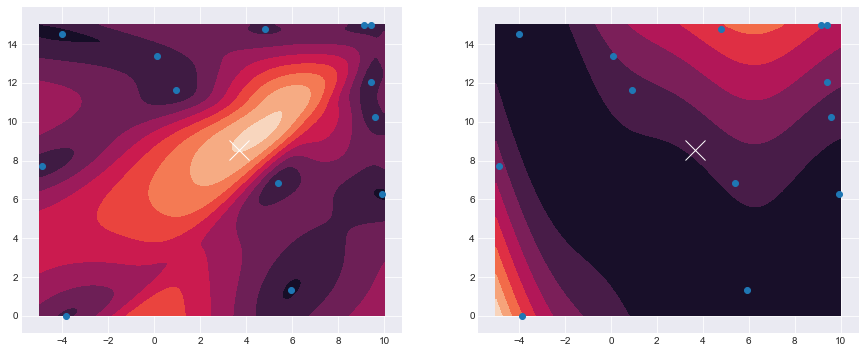

Optimization terminated successfully.
         Current function value: 187.300885
         Iterations: 94
         Function evaluations: 221


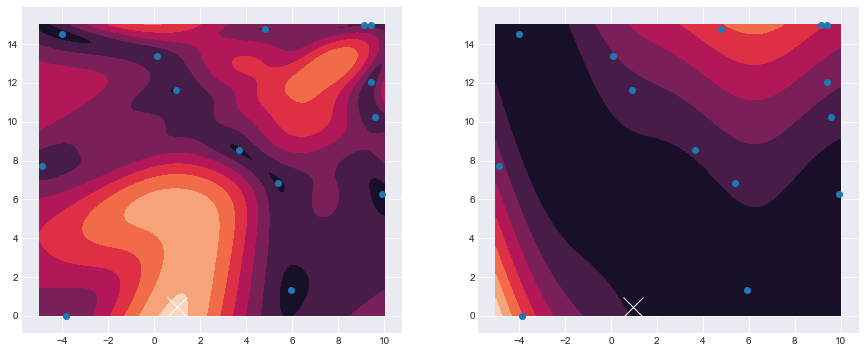

Optimization terminated successfully.
         Current function value: 183.142687
         Iterations: 69
         Function evaluations: 158


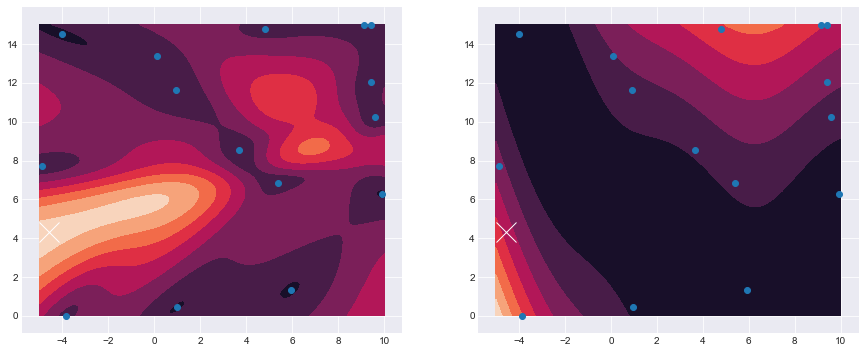

Optimization terminated successfully.
         Current function value: 185.928287
         Iterations: 75
         Function evaluations: 169


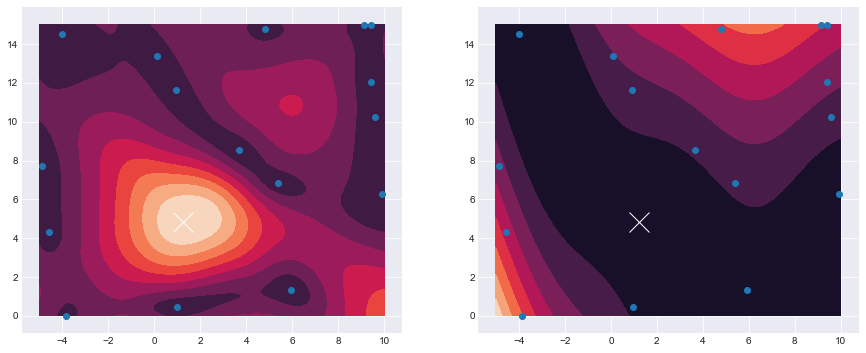

Optimization terminated successfully.
         Current function value: 185.454513
         Iterations: 60
         Function evaluations: 141


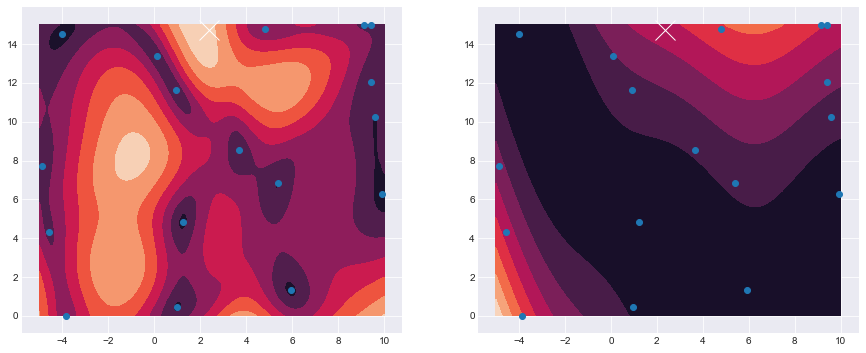

Optimization terminated successfully.
         Current function value: 190.464349
         Iterations: 55
         Function evaluations: 126


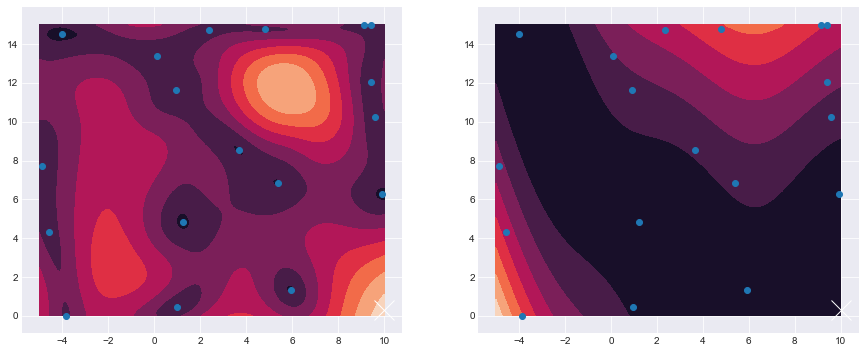

Optimization terminated successfully.
         Current function value: 193.418534
         Iterations: 70
         Function evaluations: 156


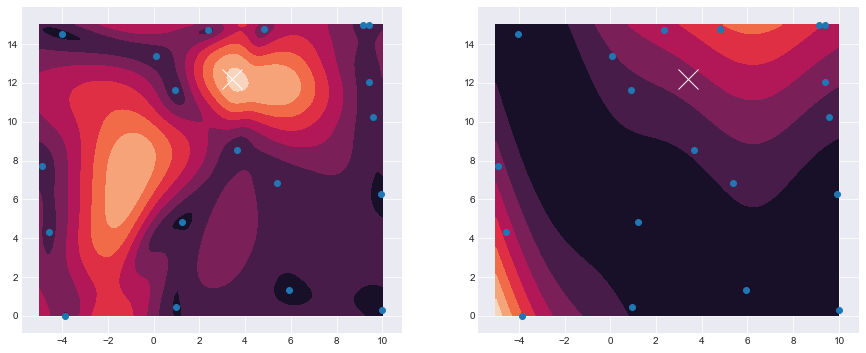

Optimization terminated successfully.
         Current function value: 225.690324
         Iterations: 64
         Function evaluations: 162


In [ ]:
input_dim = bounds.shape[0]
nn = TFModel(input_dim=input_dim, dim_basis=50, epochs=1000, batch_size=10)
reg = BayesianLinearRegression(num_mcmc=0, burn_in=1000, mcmc_steps=1000)
model = BOModel(nn, regressor=reg)
# acq = EI(model, par=0.01)
acq = UCB(model)
bo = BO(f, model, acquisition_function=acq, n_iter=20, bounds=bounds)
bo.run(do_plot=True)
bo.model.get_incumbent()

In [125]:
fig = bo.plot_2D_surface(use_plotly=True)
iplot(fig)

(100, 50) (100, 50)
(100, 50, 2)
This is the format of your plot grid:
[ (1,1) scene1 ]  [ (1,2) scene2 ]
[ (2,1) scene3 ]  [ (2,2) scene4 ]



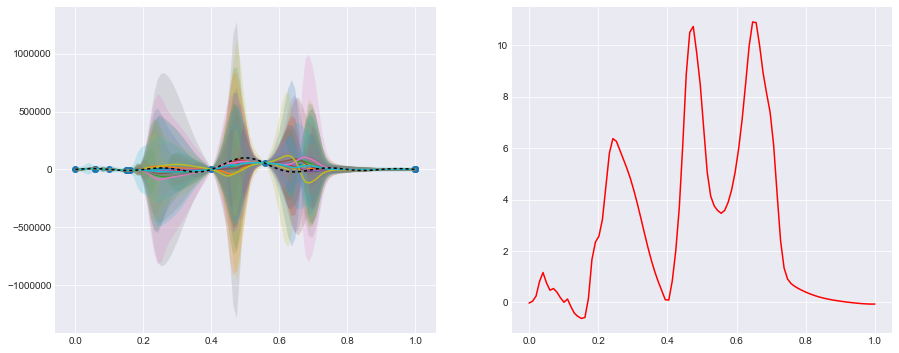

In [15]:
bo.plot_prediction()